Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
#abrimos el dataframe
df = pd.read_csv('files/flights.csv', index_col = 0)
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary
0,100018,2017,enero,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,92552
1,100102,2017,enero,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,79371
2,100140,2017,enero,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,79371
3,100214,2017,enero,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,63253
4,100272,2017,enero,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,91163


##  1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
df['year'].unique()
# lo primero que observamos es que sólo tenemos datos de los años 2017 y 2018. 
# or lo tanto, podemos filtrar el dataframe para obtener datos de cada año por separado y comparar. 

array([2017, 2018])

In [5]:
#filtramos para obtener un df con los datos del 2017
df_2017 = df[df['year'] == 2017]
df_2017


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary
0,100018,2017,enero,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,92552
1,100102,2017,enero,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,79371
2,100140,2017,enero,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,79371
3,100214,2017,enero,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,63253
4,100272,2017,enero,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,91163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403620,999891,2017,diciembre,0,0,0,0,0.0,0,0,nova_scotia,halifax,b3j_9s2,female,bachelor,married,nova,3745.37,standard,2016,5,75616
403624,356460,2017,junio,12,4,16,1024,102.0,823,66,ontario,toronto,m2p_4f6,female,master,divorced,nova,4458.11,2018_promotion,2018,3,88321
403666,663150,2017,marzo,10,3,13,832,83.0,681,55,quebec,montreal,h2y_2w2,male,college,divorced,star,4967.04,standard,2015,5,79371
403700,313477,2017,enero,8,3,11,704,70.0,548,44,alberta,edmonton,t9g_1w3,male,bachelor,married,nova,7083.21,standard,2013,7,62237


In [6]:
#agrupamos el número de vuelos reservados totales por mes en este año
df_reservas_2017 = df_2017.groupby('month')['flights_booked'].sum().reset_index()

In [7]:
#filtramos para obtener un df con los datos del 2017
df_2018 = df[df['year'] == 2018]
df_2018

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary
27,691626,2018,septiembre,8,7,15,4245,424.0,341,28,british_columbia,vancouver,v6e_3d9,female,college,married,star,5085.02,2018_promotion,2018,4,79371
86,627915,2018,noviembre,7,6,13,3757,375.0,310,25,alberta,peace_river,t9o_2w2,male,bachelor,married,star,16874.33,standard,2014,11,72438
101,471706,2018,julio,12,10,22,5896,589.0,445,36,ontario,trenton,k8v_4b2,female,bachelor,divorced,nova,10484.92,standard,2018,11,76622
131,516133,2018,noviembre,10,6,16,3936,393.0,312,25,british_columbia,vancouver,v1e_4r6,female,bachelor,married,aurora,11314.24,standard,2014,1,77959
164,409051,2018,septiembre,11,7,18,4428,442.0,343,28,ontario,toronto,p1l_8x8,male,college,single,aurora,20534.39,standard,2014,2,79371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,diciembre,0,0,0,0,0.0,0,0,ontario,toronto,m1r_4k3,male,college,married,aurora,7290.07,standard,2014,5,79371
403756,999911,2018,diciembre,0,0,0,0,0.0,0,0,newfoundland,st._john's,a1c_6h9,male,doctor,single,nova,8564.77,standard,2012,8,217943
403757,999940,2018,diciembre,3,0,3,1233,123.0,0,0,quebec,quebec_city,g1b_3l5,female,bachelor,married,nova,20266.50,standard,2017,7,47670
403758,999982,2018,diciembre,0,0,0,0,0.0,0,0,british_columbia,victoria,v10_6t5,male,college,married,star,2631.56,standard,2018,7,79371


In [8]:
#agrupamos el número de vuelos totales por mes en este año
df_reservas_2018 = df_2018.groupby('month')['flights_booked'].sum().reset_index()
df_reservas_2018

,month,flights_booked
0,abril,56791
1,agosto,90512
2,diciembre,88397
3,enero,49170
4,febrero,48643
5,julio,104143
6,junio,92749
7,marzo,66928
8,mayo,76891
9,noviembre,65345


/tmp/ipykernel_513704/863710196.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[0].set_xlabel("Meses del año 2017", Fontsize = 12)
/tmp/ipykernel_513704/863710196.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[0].set_ylabel("Total de vuelos reservados", Fontsize = 12)
/tmp/ipykernel_513704/863710196.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[1].set_xlabel("Meses del año 2018", Fontsize = 12)
/tmp/ipykernel_513704/863710196.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[1].set_ylabel("Total de vuelos reservados", Fontsize = 12);


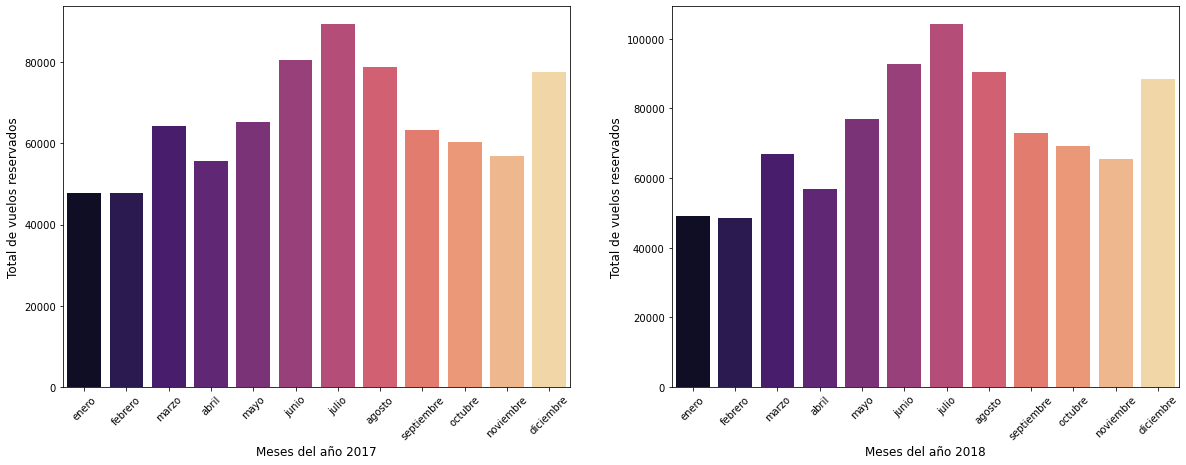

In [9]:
# el BARPLOT muestra la relación entre una variable categórica y una variable numérica

# creamos dos barplot, uno para el año 2017 y otro para el 2018
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = df_reservas_2017, 
            ax = axes[0], 
            order = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
            palette = "magma")

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = df_reservas_2018, 
            order = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
            ax = axes[1], 
            palette = "magma")

# Rotamos las etiquetas de los meses en los ejes x
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


axes[0].set_xlabel("Meses del año 2017", Fontsize = 12)
axes[0].set_ylabel("Total de vuelos reservados", Fontsize = 12)

axes[1].set_xlabel("Meses del año 2018", Fontsize = 12)
axes[1].set_ylabel("Total de vuelos reservados", Fontsize = 12);

** interpretacion **

Observamos que, tanto en el 2017 como en el 2018 las reservas de vuelos se distribuyen de forma parecida: 
la mayor cantidad de reservas conincide con los periodos de vacaciones: junio, julio, agosto y diciembre. También podemos encontrar un elevado número de reservas de vuelos los meses de marzo (que probablemente coincidan con las vacaciones de semana Santa), mayo y septiembre (meses en los que todavía el clima es favorable). 

## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

El scatterplot es una gráfica que se utiliza para trazar un gráfico de dispersión junto con una línea de regresión lineal que se ajusta a los datos. Esta línea de regresión lineal muestra la tendencia general de la relación entre dos variables y puede ayudar a identificar patrones o tendencias en los datos. 

Uusaremos este tipo de gráficas cuando queramos explorar la relación entre dos variables numéricas y al mismo tiempo, ver cómo se ajusta una línea de regresión lineal a esos datos. Es útil para identificar la dirección y la fuerza de la relación entre las variables, y para evaluar si existe una correlación lineal entre ellas.

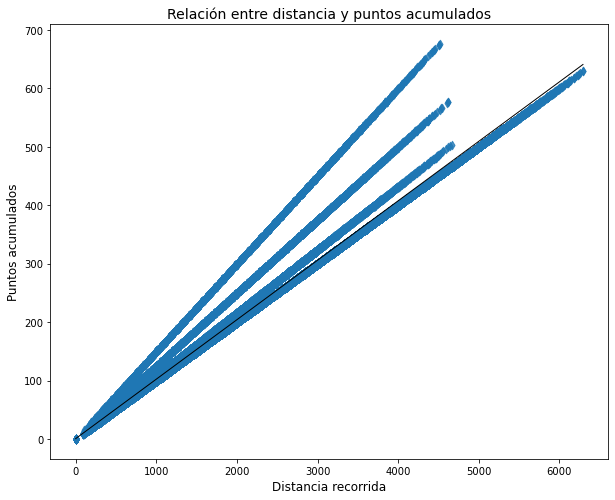

In [10]:
# creamos una gráfica básica usando 'sns.scatterplot()' 
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
plt.figure(figsize=(10, 8))

sns.regplot(x = "distance", 
            y = "points_accumulated", 
            data = df,
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            marker = "d")

# cambiamos los nombres de los ejes
plt.xlabel("Distancia recorrida", fontsize=12)
plt.ylabel("Puntos acumulados", fontsize=12)
plt.title("Relación entre distancia y puntos acumulados", fontsize=14);

** interpretación **

En este gráfico vemos que existe una relación entre ambas variables: a mayor km recorridos, mayor cantidad de puntos acumulados. Esto tiene bastante sentido, ya que premiar a los usuarios frecuentes con puntos acumulados es una práctica habitual en las compañías aéreas. Se distinguen 4 líneas que, sospechamos, pueda tener que ver con el tipo de loyalty_card que tenga el cliente.

## 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [11]:
df_distribucion = df.groupby('province')['loyalty_number'].count().reset_index()
df_distribucion

,province,loyalty_number
0,alberta,23360
1,british_columbia,106442
2,manitoba,15900
3,new_brunswick,15352
4,newfoundland,6244
5,nova_scotia,12507
6,ontario,130258
7,prince_edward_island,1584
8,quebec,79573
9,saskatchewan,9861


In [185]:
# utilizamos un BARPLOT, que es útil para mostrar la relación entre una variable categórica (provincia) y una variable numérica (cantidad de clientes)

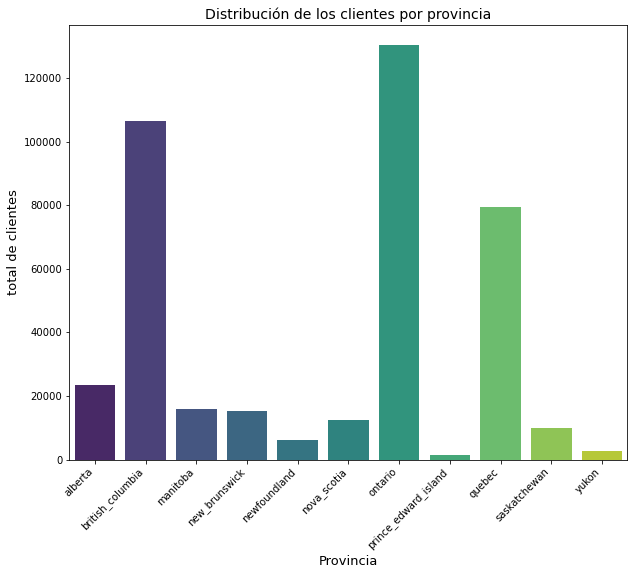

In [12]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras
ax = sns.barplot(x="province", 
                 y="loyalty_number", 
                 data=df_distribucion,
                 palette="viridis")

# Rotar los nombres de las provincias en el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Configurar etiquetas y títulos
plt.xlabel("Provincia", fontsize=13)
plt.ylabel("total de clientes", fontsize=13)
plt.title("Distribución de los clientes por provincia", fontsize=14);



** interpretacion**

Vemos que la mayor cantidad de clientes está en Quebec, Ontario y Britis_columbia. Coincide con los tres estados más poblados de Canadá 

(Fuente: https://es.wikipedia.org/wiki/Anexo:Provincias_y_territorios_de_Canad%C3%A1_ordenados_por_poblaci%C3%B3n)


## 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Tenemos una variable numérica ('salary') y otra categórica ('education')

In [22]:
#agrupamos por niveles educativos y hacemos la mediana, que es menos sensible a outliers
df_educacion_mediana = df.groupby('education')['salary'].median().reset_index()
df_educacion_mediana

,education,salary
0,bachelor,71972.0
1,college,79371.0
2,doctor,180440.0
3,high_school_or_below,61806.0
4,master,105487.0


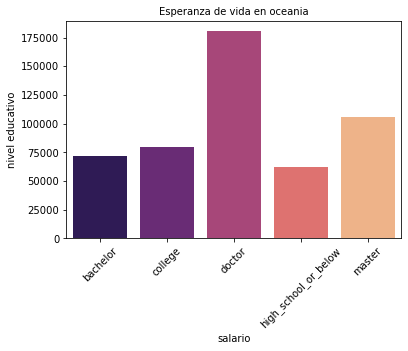

In [24]:
#realizamos un gráfico para visualizar como se distribuyen los salarios en función del nivel educativo

sns.barplot(x = "education", 
               y = "salary", 
               data = df_educacion_mediana,
               palette = "magma")


plt.xlabel("salario")
plt.ylabel("nivel educativo")
plt.xticks(rotation = 45)
plt.title("Esperanza de vida en oceania", fontsize = 10);

** Interpretacion **

Niveles educativos más altos, como doctorados y máster, parecen tener salarios más elevados. Los salarios más bajos se dan entre los clientes con menor nivel educativo. 

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

## 6. ¿Cómo se distribuyen los clientes según su estado civil y género?